In [6]:
from PIL import Image
from IPython.display import display

# Single Imputer Report

## Overview

Completed several operations working on single daphnia tracking:

- Created a class `NPZer` which unzips and unpacks `.npz` files, the output from TRex, for imputation and transformation.
- Created a class `TRexDataCleaner` which removes disjoint data points, such as large jumps in position and missing data.
- Created a class `TRexImputer` which provides a framework for applying different imputation strategies to missing daphnia tracking data, currently using only an `avgValue` function.
- Developed easy plotting functions for displaying daphnia tracking.
- Established a framework for estimating maximum daphnia velocity used in data cleaning and imputation.

---
## Walkthrough of Imputation Process

This process occurs *POST* TRex animal tracking for a single daphnia:

1. **Unzipping and Preparation**
   - Use a standardized unzipping function.
   - Include functionality to flip axes for plotting if necessary.

2. **Data Cleaning**
   - Remove discontinuities in the data.
   - Focus on critical clean-up, such as removing data where the tracker has jumped to the edge of the dish.

3. **Imputation**
   - Apply an imputation function with modular strategies.
   - Ensure the function can accommodate various imputation methods as they are developed.

4. **Standardized Plotting**
   - Implement consistent plotting of the daphnia tracking data.
   - Ensure plots accurately reflect cleaned and imputed data.





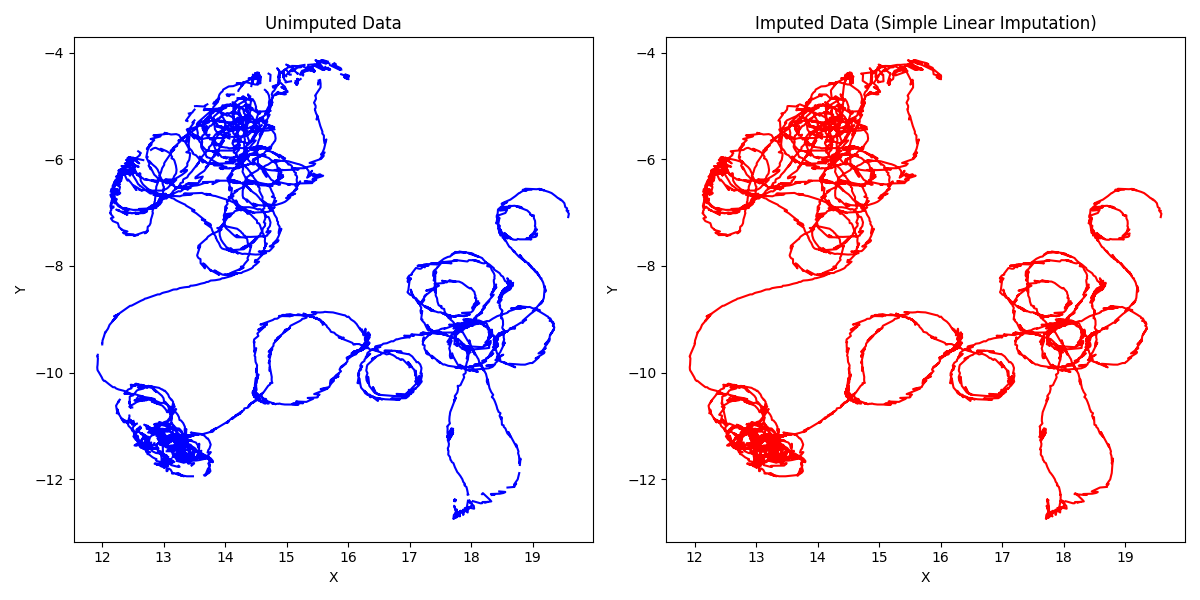

In [13]:

from PIL import Image
from IPython.display import display
#display output output\email_update_single_imputer\output_images\side_by_side_imputation.png
display(Image.open('output_images/side_by_side_imputation.png'))


### NPZer.py

`NPZer.py` contains the class `NPZer`, which unzips a `.npz` file (output of TRex tracking). This data can be directly converted to a pandas table and subsequently to a `.csv` file or plotted.

#### Example Usage:

```python
# Import necessary tools
import pandas as pd
import numpy as np
from src.data_manipulation.NPZer import NPZer

NPZer = NPZer()

# Set desired parameters
SOURCE_DIR = 'data/clean_fish_data/fish_data_clean.csv'
INVERT_Y = True
PARAMS = ['time', 'X', 'Y']

# Unzip and turn data into a pandas table
unzippedData = NPZer.pandafy(source_dir=SOURCE_DIR, invertY=INVERT_Y, params=PARAMS)

# Print data in the form of a pandas table
print('TRex Data:\n', unzippedData)

### Output

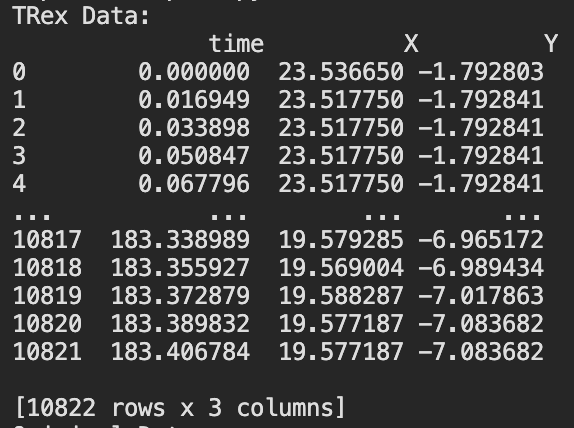

In [ ]:
display(Image.open('output_images/NPZer_output.png'))

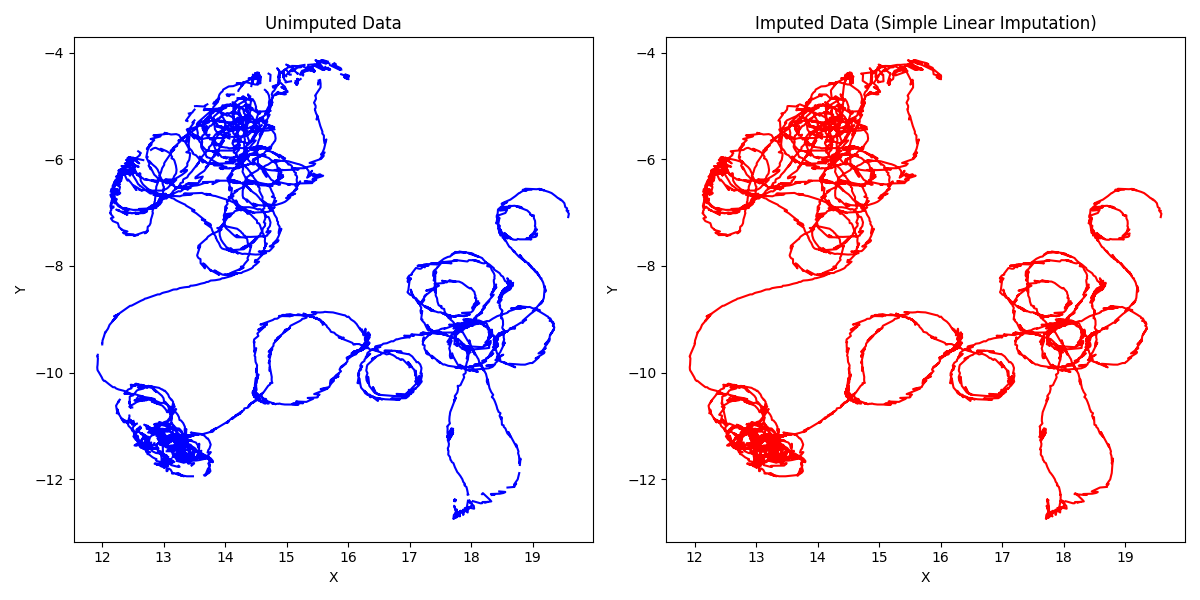

In [10]:
#display output output\email_update_single_imputer\output_images\side_by_side_imputation.png
display(Image.open('output_images/side_by_side_imputation.png'))

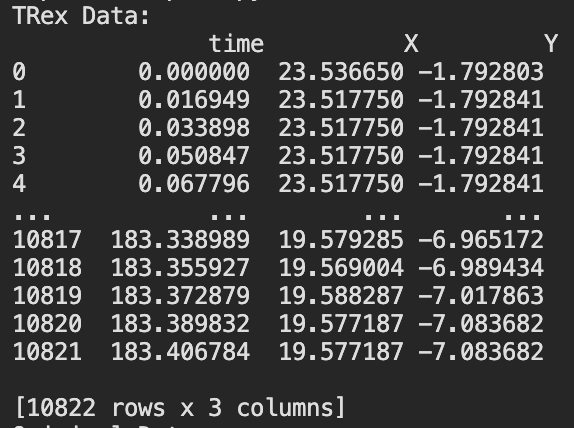


---
### TRexDataCleaner.py
`TRexDataCleaner.py` contains the class `TRexDataCleaner`, which is used to clean disjoint data in TRex tracking data for later imputation. Disjoint data points are rendered as np.inf.

Example Usage:

```python

# Import necessary tools
from src.data_manipulation.TRexDataCleaner import TRexDataCleaner

dataCleaner = TRexDataCleaner()

# Set desired parameters
VMAX = 1

# Set sample of original data
originalData = unzippedData[:25]

# Print sample of original data
print('Original Data:\n', originalData)

# Clean data
cleanedData, removedData = dataCleaner.renderDiscontinuities(data=originalData, vmax=25)

# Print cleaned data
print('Cleaned Data:\n', cleanedData)

---

###  TRexImputer.py

`TRexImputer.py` holds the class `TRexImputer` which is used to impute/fill in discontinuous TRex data with a desired `impute` function. This should be used with data already cleaned with `TRexDataCleaner`

## Example Usage

```python

# Import necessary tools
from src.data_manipulation.TRexImputer import TRexImputer

imputer = TRexImputer()

# Set desired parameters
DATA = cleanedData
FUNCTION = 'avgValue'

# Print original data
print('Original Data:\n', cleanedData)


# Impute data
imputedData = imputer.impute(data=DATA, function=FUNCTION)

# Print imputed data
print('Imputed Data:\n', imputedData)




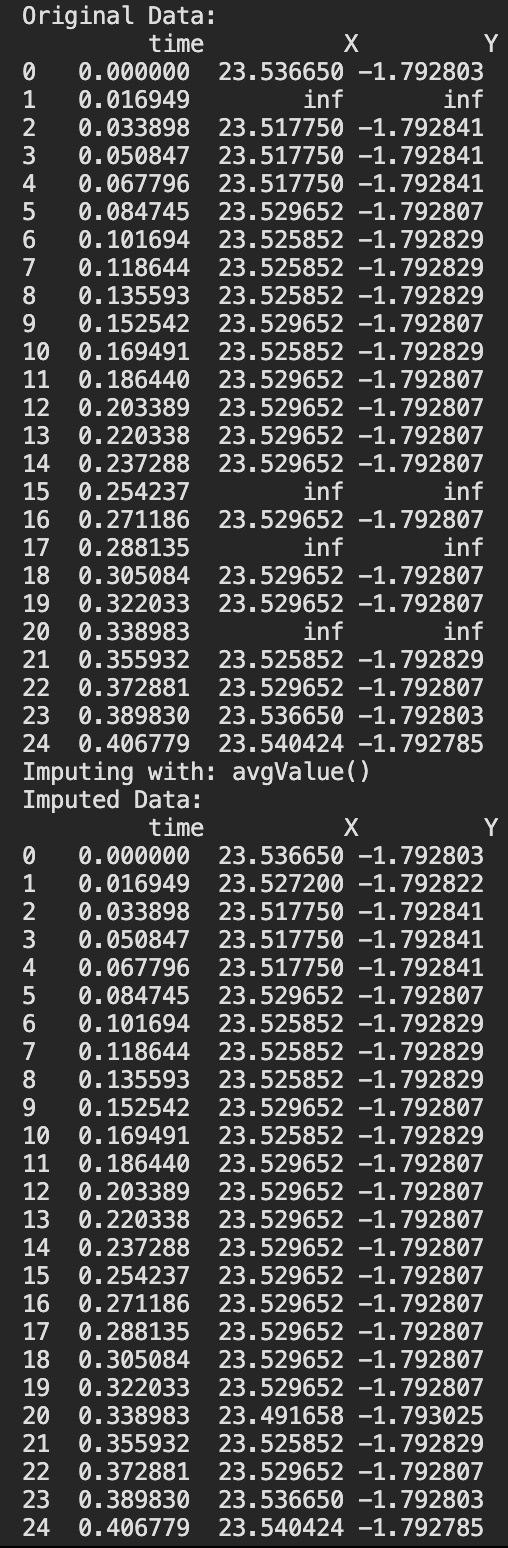

In [4]:
display(Image.open('output_images/TRexImputer_output.png'))

# avgValue.py

## `avgValue.py` holds the `impute` function which imputes data in between gaps of discontinuous points. The function calculates the velocity between each gap of data, and imputes the respective points according it.

## Example usage
### Usage is shown in above example as `FUNCTION = 'avgValue'`

# plotDetail.py

## Overview
`plotDetail.py` contains the `plotDetail` function, which:
- Accepts a CSV or NPZ file.
- Requires declarations of X, Y, and time values.
- Plots a graph representing the path of the Daphnia's movements with placeholder labels.

## Example Usage
```python
# Import necessary tools
from src.data_manipulation.plotDetail import plotDetail
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Copy the path of the NPZ file
npz_path = r"/Users/ibrahimrahat/Documents/GitHub/daphnia/data/npz_file/single_7_9_fish1.MP4_fish0.npz"

# Use np.load to load the npz file
data = np.load(npz_path)

# Declare X, Y, and time columns
X = data['X']
Y = data['Y']
timestamp = data['timestamp']

# Use pandas to enter values into a dataframe
df = pd.DataFrame(
    {
        "X": X,
        "Y": Y,
        "time": timestamp
    }
)

# Plots a graph of the Daphnia's movements
plotDetail(df, invert_y=False)

# avg_velocity.py

## Overview
`avg_velocity.py` contains:
- The `all_velocity` function, which calculates the average velocities between consecutive coordinates and stores them in a vector.
- The `plot_histogram` function, which creates and plots a histogram showing the frequency of each average velocity.

## Example Usage
### Usage
Use the `all_velocity` function to compute average velocities and the `plot_histogram` function to visualize the distribution of these velocities.

```python

# Import necessary tools
import pytest
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from missing_data_dev.max_velocity.avg_velocity import calc_velocity, avg_velocity, all_velocity, plot_histogram

# Create and declare the directory for all the CSV files
#direct_path = "/Users/ibrahimrahat/Documents/GitHub/daphnia/data/table_data"
relative_path = "data/table_data"
all_files = os.listdir(relative_path)

# Create an empty dataframe
dataframes = []

# Loop through and have pandas read each CSV file
for file in all_files:
    file_path = os.path.join(relative_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)



# Call the function all_velocity and store all the velocities into a variable
all_velo = all_velocity(dataframes)

# Plot the velocities in a histogram
plot_histogram(all_velo)


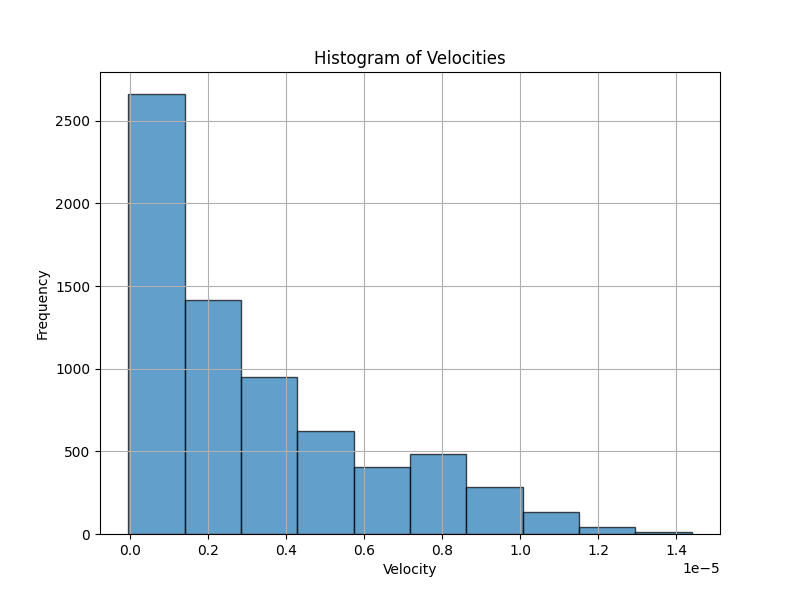

In [12]:
display(Image.open('output_images/histogram of daphnia velocities.png'))

### Visualizing an Edge Discontinuity

- **Original Data**: Displays synthetic daphnia movement with edge discontinuities.
- **After Cleaning**: Data cleaned using TRexCleaner to address discontinuities.
- **After Imputation**: Data imputed with TRexImputer to smooth out gaps and improve continuity.


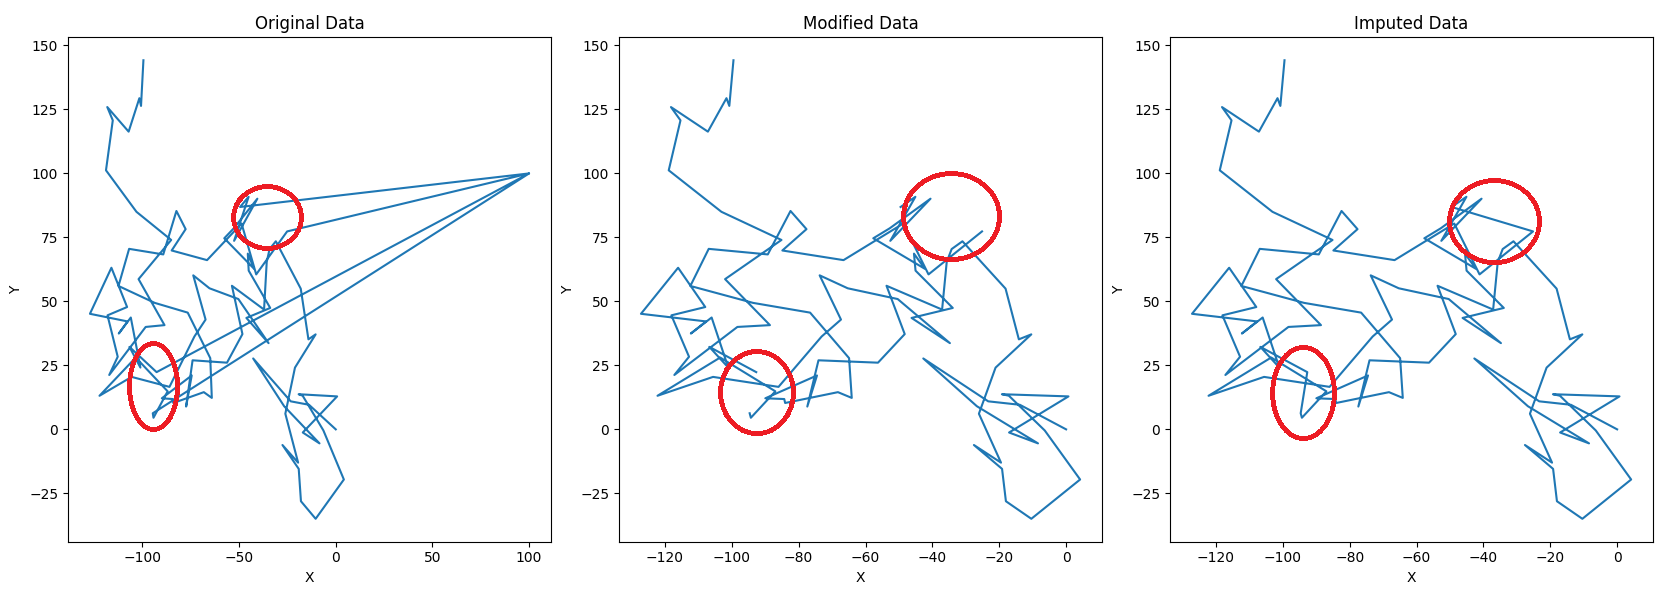

In [11]:

display(Image.open('output_images/side by side discontinuity example_highlighted.png'))